In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from scipy import optimize as opt

import pandas as pd
import xarray as xr

import netCDF4 as nc4

import shutil
import datetime
import subprocess

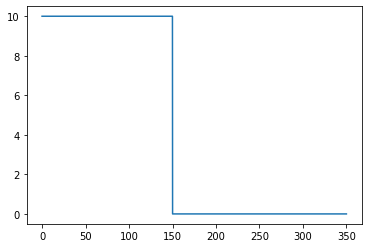

In [15]:
t = np.arange(350 * 12) / 12.
flat10_y = np.zeros(350 * 12) * 1.
flat10_y[0:1800] = 10.
flat10_y[1800:3601] = 0.


flat10_yy = flat10_y.cumsum()/12.

plt.plot(t,flat10_y)

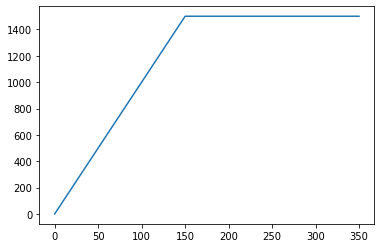

In [16]:
plt.plot(t,flat10_yy)

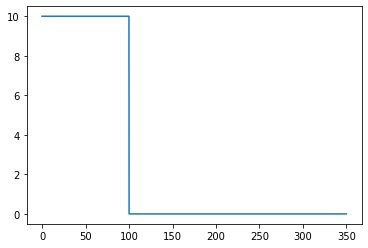

In [18]:
t = np.arange(350 * 12) / 12.
flat10zec_y = np.zeros(350 * 12) * 1.
flat10zec_y[0:1200] = 10.
flat10zec_y[1200:3601] = 0.

flat10zec_yy = flat10zec_y.cumsum()/12.

plt.plot(t,flat10zec_y)

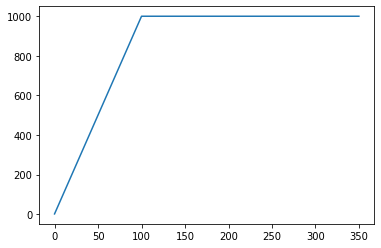

In [19]:
plt.plot(t,flat10zec_yy)

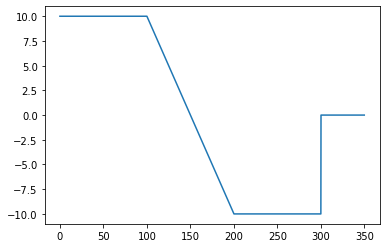

In [20]:
t = np.arange(350 * 12) / 12.
flat10cdr_y = np.zeros(350 * 12) * 1.
flat10cdr_y[0:1200] = 10.
flat10cdr_y[1200:2400] = 10. - (0.2 *  np.arange(100*12)/12.)
flat10cdr_y[2400:3601] = -10.


flat10cdr_yy = flat10cdr_y.cumsum()/12.

plt.plot(t,flat10cdr_y)

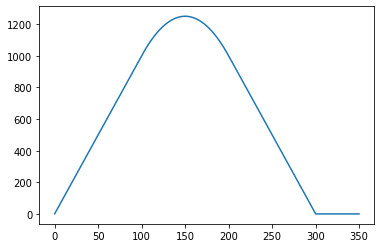

In [21]:
plt.plot(t,flat10cdr_yy)

In [22]:
mapfile = xr.open_dataset('surfdata_0.9x1.25_hist_78pfts_CTSM52_simyr1850_c220305.nc')
areas = mapfile['AREA'].sum()
global_gridcell_integrated_area = float(areas.data)

In [23]:
print (global_gridcell_integrated_area)

510099747.5276341


In [25]:
fname_base = 'emissions-cmip6_CO2_anthro_surface_175001-201512_fv_0.9x1.25_c20181011.nc'

datestring = str(datetime.date.today().year * 10000 + datetime.date.today().month * 100 + datetime.date.today().day)
fname_new_flat10 = 'emissions_idealized_flat10_cdk_'+datestring+'.nc'
fname_new_flat10zec = 'emissions_idealized_flat10zec_cdk_'+datestring+'.nc'
fname_new_flat10cdr = 'emissions_idealized_flat10cdr_cdk_'+datestring+'.nc'

shutil.copyfile(fname_base, fname_new_flat10)
shutil.copyfile(fname_base, fname_new_flat10zec)
shutil.copyfile(fname_base, fname_new_flat10cdr)

'emissions_idealized_flat10cdr_cdk_20230901.nc'

In [26]:
file_flat10 = nc4.Dataset(fname_new_flat10, 'r+')

In [27]:
time_firstyear = file_flat10.variables['time'][0:12]
time_bnds_firstyear = file_flat10.variables['time_bnds'][0:12,:]

nyears_out = 350
ts_out = nyears_out * 12
year_out = np.floor(np.arange(ts_out) / 12)
month_out = np.tile(time_firstyear,nyears_out)
date_out = year_out*365 + month_out

month_out_bnds = np.tile(time_bnds_firstyear,(nyears_out,1))
#month_out_bnds.shape
date_out_bnds = np.tile(year_out, (2,1)).transpose()*365 + month_out_bnds


file_flat10.variables['time'][:] = date_out

file_flat10.variables['time_bnds'][:] = date_out_bnds

t = date_out / 365.

IM = len(file_flat10.variables['lon'][:])
JM = len(file_flat10.variables['lat'][:])

In [30]:
co2fluxdata_flat10 = np.tile(flat10_y * 1.e12 * (44.01/12.01) / (global_gridcell_integrated_area * 86400. * 365.), (IM,JM,1))


In [31]:
file_flat10.variables['CO2_flux'][:] = co2fluxdata_flat10.transpose()

file_flat10.variables['time'].units = 'days since 0001-01-01 00:00:00'

file_flat10.data_title = "Idealized flat10 experiment" ;
file_flat10.data_summary = ""
file_flat10.source_files = "netcdf template from emissions-cmip6_CO2_anthro_surface_175001-201512_fv_0.9x1.25_c20181011.nc. script for generating is on https://github.com/ckoven/flat10. gridcell areas from areacella_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc"
file_flat10.data_creator = "peter lawrence, lawrence@ucar.edu"
file_flat10.creation_date = datetime.date.today().isoformat()
file_flat10.data_script = "cmip7flat10emissionfilegeneration.ipynb"
file_flat10.data_reference = "n/a"

In [32]:
file_flat10zec = nc4.Dataset(fname_new_flat10zec, 'r+')

In [33]:
time_firstyear = file_flat10zec.variables['time'][0:12]
time_bnds_firstyear = file_flat10zec.variables['time_bnds'][0:12,:]

nyears_out = 350
ts_out = nyears_out * 12
year_out = np.floor(np.arange(ts_out) / 12)
month_out = np.tile(time_firstyear,nyears_out)
date_out = year_out*365 + month_out

month_out_bnds = np.tile(time_bnds_firstyear,(nyears_out,1))
#month_out_bnds.shape
date_out_bnds = np.tile(year_out, (2,1)).transpose()*365 + month_out_bnds


file_flat10zec.variables['time'][:] = date_out

file_flat10zec.variables['time_bnds'][:] = date_out_bnds

t = date_out / 365.

IM = len(file_flat10zec.variables['lon'][:])
JM = len(file_flat10zec.variables['lat'][:])

In [34]:
co2fluxdata_flat10zec = np.tile(flat10zec_y * 1.e12 * (44.01/12.01) / (global_gridcell_integrated_area * 86400. * 365.), (IM,JM,1))

In [35]:
file_flat10zec.variables['CO2_flux'][:] = co2fluxdata_flat10zec.transpose()

file_flat10zec.variables['time'].units = 'days since 0001-01-01 00:00:00'

file_flat10zec.data_title = "Idealized flat10 zec experiment" ;
file_flat10zec.data_summary = ""
file_flat10zec.source_files = "netcdf template from emissions-cmip6_CO2_anthro_surface_175001-201512_fv_0.9x1.25_c20181011.nc. script for generating is on https://github.com/ckoven/flat10. gridcell areas from areacella_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc"
file_flat10zec.data_creator = "peter lawrence, lawrence@ucar.edu"
file_flat10zec.creation_date = datetime.date.today().isoformat()
file_flat10zec.data_script = "cmip7flat10emissionfilegeneration.ipynb"
file_flat10zec.data_reference = "n/a"

In [36]:
file_flat10cdr = nc4.Dataset(fname_new_flat10cdr, 'r+')

In [37]:
time_firstyear = file_flat10cdr.variables['time'][0:12]
time_bnds_firstyear = file_flat10cdr.variables['time_bnds'][0:12,:]

nyears_out = 350
ts_out = nyears_out * 12
year_out = np.floor(np.arange(ts_out) / 12)
month_out = np.tile(time_firstyear,nyears_out)
date_out = year_out*365 + month_out

month_out_bnds = np.tile(time_bnds_firstyear,(nyears_out,1))
#month_out_bnds.shape
date_out_bnds = np.tile(year_out, (2,1)).transpose()*365 + month_out_bnds


file_flat10cdr.variables['time'][:] = date_out

file_flat10cdr.variables['time_bnds'][:] = date_out_bnds

t = date_out / 365.

IM = len(file_flat10cdr.variables['lon'][:])
JM = len(file_flat10cdr.variables['lat'][:])

In [38]:
co2fluxdata_flat10cdr = np.tile(flat10cdr_y * 1.e12 * (44.01/12.01) / (global_gridcell_integrated_area * 86400. * 365.), (IM,JM,1))

In [39]:
file_flat10cdr.variables['CO2_flux'][:] = co2fluxdata_flat10cdr.transpose()

file_flat10cdr.variables['time'].units = 'days since 0001-01-01 00:00:00'

file_flat10cdr.data_title = "Idealized flat10 cdr experiment" ;
file_flat10cdr.data_summary = ""
file_flat10cdr.source_files = "netcdf template from emissions-cmip6_CO2_anthro_surface_175001-201512_fv_0.9x1.25_c20181011.nc. script for generating is on https://github.com/ckoven/flat10. gridcell areas from areacella_fx_CESM2_1pctCO2_r1i1p1f1_gn.nc"
file_flat10cdr.data_creator = "peter lawrence, lawrence@ucar.edu"
file_flat10cdr.creation_date = datetime.date.today().isoformat()
file_flat10cdr.data_script = "cmip7flat10emissionfilegeneration.ipynb"
file_flat10cdr.data_reference = "n/a"